In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mnist import MNIST

from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import time
mnist = MNIST('data')

# Necessary format for sklearn
x_train, y_train = mnist.load_training()
x_test, y_test = mnist.load_testing()
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.int32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.int32)

60000


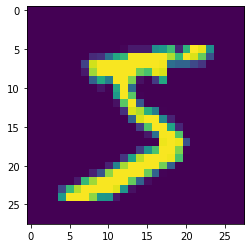

In [53]:

#print(x_training[0])

print(len(x_train))
plt.figure()
plt.imshow(x_train[0].reshape(28,28))
plt.show()




In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Using KNN on the training set
def KNNC(x_train, y_train,K):
    timespended = []
    t0 = time.time()
    
    model = KNeighborsClassifier(n_neighbors=K, metric="euclidean")

    model.fit(x_train, y_train)
    timespended.append(time.time() - t0)
    print(timespended)
    return model

knn = KNNC(x_train, y_train,3)
y_pred = knn.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
reports = classification_report(y_test, y_pred)

[0.09193587303161621]


0.9705
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



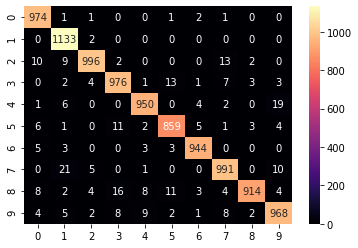

In [55]:
import seaborn as sb
correct = np.sum(np.diag(conf_mat))
N_test = 10000
print(correct/N_test)
heatmap = sb.heatmap(conf_mat, annot=True, fmt="d", cmap ="magma")
print(reports)

True: 4 Predicted: 9


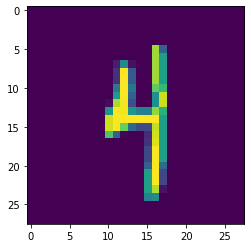

True: 4 Predicted: 9


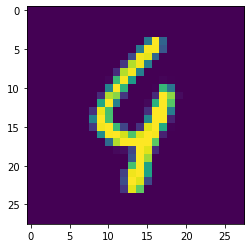

True: 3 Predicted: 5


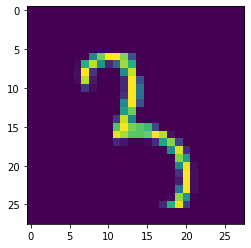

In [56]:

def show_missclassified(num):
    missed = 0
    for i in range(len(y_pred)):
        if y_pred[i]!=y_test[i]:
            missed += 1
            print("True:", y_test[i], "Predicted:", y_pred[i])
            plt.figure(i)
            plt.imshow(x_test[i].reshape(28,28))
            plt.show()
        if missed == num:
            break
            
            

show_missclassified(3)

True: 7 Predicted: 7


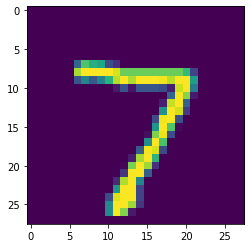

True: 2 Predicted: 2


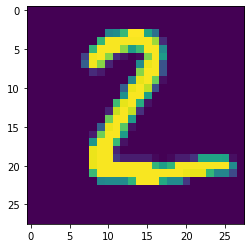

True: 1 Predicted: 1


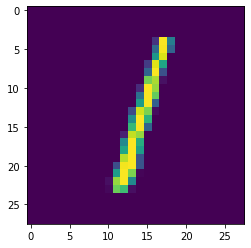

True: 0 Predicted: 0


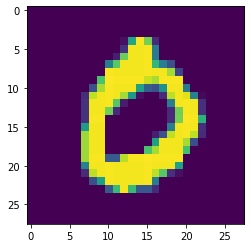

True: 4 Predicted: 4


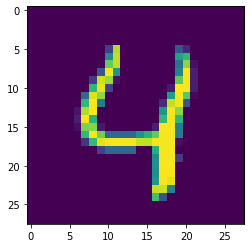

In [57]:
def show_classified(num):
    missed = 0
    for i in range(len(y_pred)):
        if y_pred[i]==y_test[i]:
            missed += 1
            print("True:", y_test[i], "Predicted:", y_pred[i])
            plt.figure(i)
            plt.imshow(x_test[i].reshape(28,28))
            plt.show()
        if missed == num:
            break
            
show_classified(5)    

In [ ]:


def get_class(x,y):
    classes = {}
    for key in np.unique(y):
        classes[key] = []
    for key, data in zip(x,y):
        classes[key].append(data)
    return classes
        
from sklearn.cluster import KMeans

def create_templates(classes):
    
    k_means = KMeans(n_clusters=64)
    items = tqdm(classes.items())
    
    templates = {}
    for key, data in items:
        classes_kmeans = k_means.fit(data)
        template_data = classes_kmeans.cluster_centers_
        templates[key] = template_data
    return templates


classes = get_class(y_train, x_train)
templates = create_templates(classes)
print(type(x_train))